In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
import xgboost as xgb
import pickle

In [20]:
target = "diff_incident_area"
id_cols = ['fire_id', 'report_id']
test_df = pd.read_csv("data/preprocessed/test.csv")
X_test = test_df.drop(columns=id_cols+[target])
y_test = test_df[target]

In [10]:
with open("models/LinearRegression.pkl", "rb") as f:
    linear_regression = pickle.load(f)

In [13]:
model_names = ["LinearRegression", "Lasso", "Ridge", "XGB"]
models = {}
for model_name in model_names:
    with open(f"models/{model_name}.pkl", "rb") as f:
        model = pickle.load(f)
        models[model_name] = model
    #print(model_name, model.score(test_df.drop(target, axis=1), test_df[target]))

In [25]:
def eval_model(model_name, X, y):
    model = models[model_name]
    y_pred = model.predict(test_df.drop([target]+id_cols, axis=1))
    return np.mean(np.abs(y_pred - y))

for name in model_names:
    print(f"{name} : {eval_model(name, X_test, y_test):.2f}")

LinearRegression : 1238.96
Lasso : 1174.56
Ridge : 1234.02
XGB : 899.95


## Specific interpretations

### Linear regression

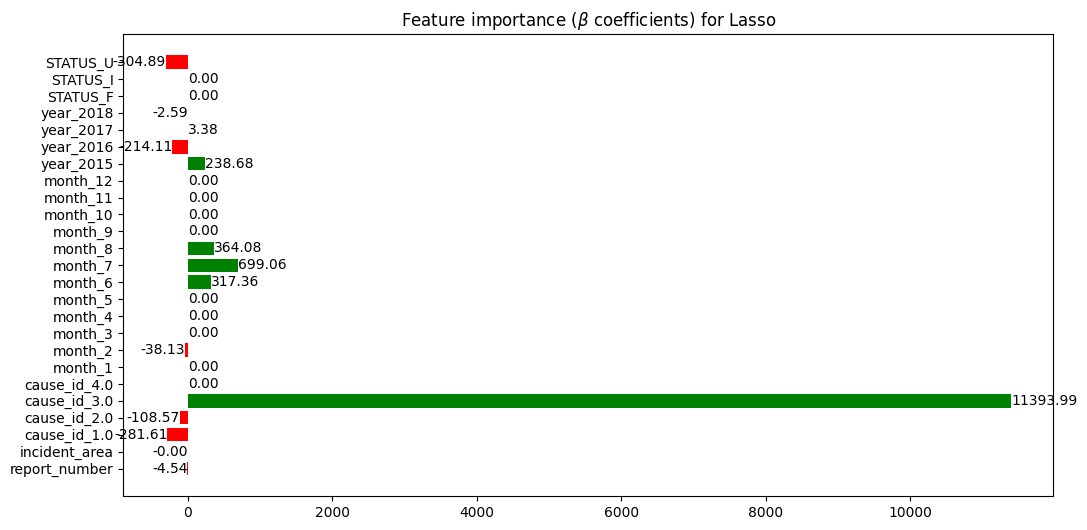

In [33]:
plt.figure(figsize=(12, 6))
model_name = "Lasso"
estimator = models[model_name]
colors = ["green" if c > 0 else "red" for c in estimator.coef_]
bars = plt.barh(X_test.columns, estimator.coef_, color=colors)

# Annotate the bars with their values
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width > 0 else width - 0.1
    plt.text(
        label_x_pos,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",
        va="center",
        ha="right" if width < 0 else "left",
    )

plt.title(rf"Feature importance ($\beta$ coefficients) for {model_name}")
plt.show()

## Markdown

In [36]:
models['XGB'].get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [34]:
from sklearn.tree import plot_tree
plot_tree(models['XGB'], max_depth=2, feature_names=X_test.columns, fontsize=10)

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) instead.